<h1>Data Preprocessing<h1>

<h2>Data reading<h2>

In [1]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from extract_dataframe import TweetDfExtractor
from extract_dataframe import read_json

_, tweet_list = read_json("../data/covid19.json")

In [2]:
tweets_df_extractor = TweetDfExtractor(tweet_list)
tweets_df = tweets_df_extractor.get_tweet_df()
tweets_df.head()

,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Jun 18 17:55:49 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...","🚨Africa is ""in the midst of a full-blown third...",Africa is in the midst of a fullblown third wa...,positive,0.166667,0.188889,en,548,612,ketuesriche,551,351,False,,@whoafro @jriggers,Mass
1,Fri Jun 18 17:55:59 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Dr Moeti is head of WHO in Africa, and one of ...","Dr Moeti is head of WHO in Africa, and one of ...",positive,0.133333,0.455556,en,195,92,Grid1949,66,92,False,,,"Edinburgh, Scotland"
2,Fri Jun 18 17:56:07 +0000 2021,"<a href=""http://twitter.com/download/iphone"" r...",Thank you @research2note for creating this ama...,Thank you @research2note for creating this ama...,positive,0.316667,0.483333,en,2,1,LeeTomlinson8,1195,1176,None,#red4research,@research2note @nhsrdforum,None
3,Fri Jun 18 17:56:10 +0000 2021,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Former Pfizer VP and Virologist, Dr. Michael Y...","Former Pfizer VP and Virologist, Dr Michael Ye...",positive,0.086111,0.197222,en,1580,899,RIPNY08,2666,2704,False,#covid19,,None
4,Fri Jun 18 17:56:20 +0000 2021,"<a href=""http://twitter.com/download/android"" ...",I think it’s important that we don’t sell COVA...,I think it’s important that we don’t sell COVA...,positive,0.280000,0.620000,en,72,20,pash22,28250,30819,None,,@texaschildrens @biological_e,United Kingdom


In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   clean_text          6532 non-null   object 
 4   sentiment           6532 non-null   object 
 5   polarity            6532 non-null   float64
 6   subjectivity        6532 non-null   float64
 7   lang                6532 non-null   object 
 8   favorite_count      6532 non-null   int64  
 9   retweet_count       6532 non-null   int64  
 10  original_author     6532 non-null   object 
 11  followers_count     6532 non-null   int64  
 12  friends_count       6532 non-null   int64  
 13  possibly_sensitive  3618 non-null   object 
 14  hashtags            6532 non-null   object 
 15  user_mentions       6532 non-null   object 
 16  place 

<h2>Remove duplicate rows<h2>

In [3]:
from clean_tweets_dataframe import Clean_Tweets
clean_tweets = Clean_Tweets(tweets_df)

Automation in Action...!!!


In [5]:
tweets_df.shape

(6532, 17)

In [5]:
clean_tweets.drop_duplicates(tweets_df)
tweets_df.shape

(6532, 17)

There are no duplicate rows.

<h2>Remove tweets that are not english<h2>

In [6]:
tweets_df = clean_tweets.remove_non_english_tweets(tweets_df)
tweets_df.shape

(6532, 17)

There are no non-english tweets.

<h2>Missing values<h2>

In [4]:
tweets_df.isna().sum()

created_at               0
source                   0
original_text            0
clean_text               0
sentiment                0
polarity                 0
subjectivity             0
lang                     0
favorite_count           0
retweet_count            0
original_author          0
followers_count          0
friends_count            0
possibly_sensitive    2914
hashtags                 0
user_mentions            0
place                 2444
dtype: int64

<h2>Handle missing values<h2>

In [5]:
# replace null values in place column to "Not provided"
tweets_df = clean_tweets.fill_missing(tweets_df, "place", "Not provided")
tweets_df = clean_tweets.fill_missing(tweets_df, "possibly_sensitive", "unknown")
tweets_df.isna().sum()

created_at            0
source                0
original_text         0
clean_text            0
sentiment             0
polarity              0
subjectivity          0
lang                  0
favorite_count        0
retweet_count         0
original_author       0
followers_count       0
friends_count         0
possibly_sensitive    0
hashtags              0
user_mentions         0
place                 0
dtype: int64

<h2>Remove unwanted characters<h2>

In [6]:
# since place can contain emojiis like flags, we will remove those characters.
tweets_df = clean_tweets.remove_characters(tweets_df, "place")

<h2>Replace emty strings<h2>

In [8]:
tweets_df[tweets_df["place"] == ""].shape

(83, 17)

There are 83 rows with empty string as the ir place value. This is because all the characters were non-alphanumeric and removed by the function remove_characters.

In [9]:
tweets_df = clean_tweets.replace_empty_string(tweets_df, "place", "Not provided")

In [10]:
tweets_df[tweets_df["place"] == ""].shape

(0, 17)

<h2>Convert to datetime<h2>

In [9]:
tweets_df = clean_tweets.convert_to_datetime(tweets_df)
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   created_at          6532 non-null   datetime64[ns, UTC]
 1   source              6532 non-null   object             
 2   original_text       6532 non-null   object             
 3   clean_text          6532 non-null   object             
 4   sentiment           6532 non-null   object             
 5   polarity            6532 non-null   float64            
 6   subjectivity        6532 non-null   float64            
 7   lang                6532 non-null   object             
 8   favorite_count      6532 non-null   int64              
 9   retweet_count       6532 non-null   int64              
 10  original_author     6532 non-null   object             
 11  followers_count     6532 non-null   int64              
 12  friends_count       6532 non-null 

<h2>Extract device from source text<h2>

In [11]:
tweets_df["source"] = tweets_df["source"].apply(clean_tweets.extract_device_name)

In [12]:
tweets_df["source"].value_counts()

Twitter for Android    2071
Twitter for iPhone     1982
Twitter Web App        1345
Vaccine finder          530
Twitter for iPad        267
                       ... 
Globetweeter              1
My Favorite RT Bot        1
COVID19-Updates           1
LinkedIn                  1
SmartTaipei               1
Name: source, Length: 98, dtype: int64

<h2>Save pre-processed data<h2>

In [19]:
tweets_df.to_csv("../data/processed_tweets.csv", index=False)

<h1>Data Exploration<h1>

<h2>Basic info<h2>

In [20]:
tweets_df = pd.read_csv("../data/processed_tweets.csv")

In [22]:
# shape of dataframe
tweets_df.shape

(6532, 17)

In [21]:
# general info about null values, data types, columns
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          6532 non-null   object 
 1   source              6532 non-null   object 
 2   original_text       6532 non-null   object 
 3   clean_text          6532 non-null   object 
 4   sentiment           6532 non-null   object 
 5   polarity            6532 non-null   float64
 6   subjectivity        6532 non-null   float64
 7   lang                6532 non-null   object 
 8   favorite_count      6532 non-null   int64  
 9   retweet_count       6532 non-null   int64  
 10  original_author     6532 non-null   object 
 11  followers_count     6532 non-null   int64  
 12  friends_count       6532 non-null   int64  
 13  possibly_sensitive  6532 non-null   object 
 14  hashtags            6532 non-null   object 
 15  user_mentions       6532 non-null   object 
 16  place 

In [23]:
tweets_df.isna().sum()

created_at             0
source                 0
original_text          0
clean_text             0
sentiment              0
polarity               0
subjectivity           0
lang                   0
favorite_count         0
retweet_count          0
original_author        0
followers_count        0
friends_count          0
possibly_sensitive     0
hashtags               0
user_mentions          0
place                 83
dtype: int64

In [16]:
# stats about numerical columns
tweets_df.describe()

,polarity,subjectivity,favorite_count,retweet_count,followers_count,friends_count
count,6532.000000,6532.000000,6532.000000,6532.000000,6.532000e+03,6532.000000
mean,0.050195,0.412159,242.896050,126.928353,1.649915e+04,1707.652021
std,0.311941,0.316800,617.588401,258.437016,2.597877e+05,5148.761957
min,-1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.125000,0.000000,0.000000,8.900000e+01,162.000000
50%,0.028125,0.400000,28.000000,14.000000,4.545000e+02,560.500000
75%,0.207273,0.633333,309.000000,131.250000,1.769000e+03,1765.000000
max,1.000000,1.000000,20527.000000,6847.000000,1.366658e+07,237298.000000


<h2>Original authors<h2>

In [31]:
tweets_df.original_author.value_counts()

PuneUpdater        530
viralvideovlogs     45
WHO__India          27
Signal__Pump        27
Rosenchild          11
                  ... 
anna_isaac           1
1ayBaja              1
SireOfSeth           1
sk23webb             1
Elio61507818         1
Name: original_author, Length: 5248, dtype: int64

PuneUpdater is the original author for around 10% of the tweets.

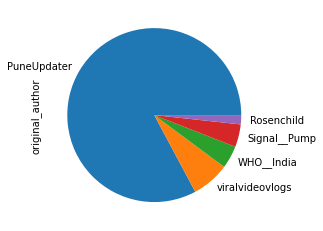

In [32]:
tweets_df.original_author.value_counts().head(5).plot(kind="pie");

<h2>Location<h2>

In [17]:
tweets_df.place.value_counts()

Not provided                    2444
United States                     53
South Africa                      53
Malaysia                          45
Canada                            45
                                ... 
Johannesburg                       1
LondonEssex boundary England       1
Faversham England                  1
Doha Qatar                         1
worldwide worldwide                1
Name: place, Length: 2172, dtype: int64

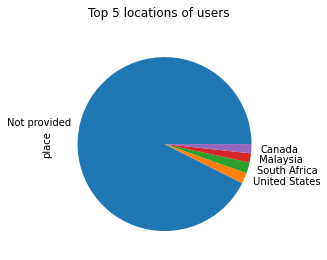

In [18]:
# top 5 locations of users
top_locations = tweets_df.place.value_counts().head(5)
top_locations.plot(kind="pie", subplots=True, title="Top 5 locations of users");

<h2>Source<h2>

In [26]:
tweets_df["source"].value_counts()

Twitter for Android    2071
Twitter for iPhone     1982
Twitter Web App        1345
Vaccine finder          530
Twitter for iPad        267
                       ... 
Bot Libre!                1
Mirage News Posts         1
current news              1
allAfrica.com             1
Sendible                  1
Name: source, Length: 98, dtype: int64

<AxesSubplot:ylabel='source'>

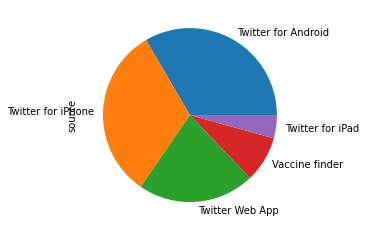

In [14]:
tweets_df["source"].value_counts().head().plot(kind="pie")

<h2>Sentiments<h2>

In [19]:
tweets_df["sentiment"].value_counts()

positive    3426
neutral     1829
negative    1277
Name: sentiment, dtype: int64

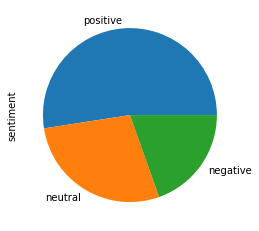

In [20]:
tweets_df["sentiment"].value_counts().plot(kind="pie");

<h2>Hashtags<h2>

In [21]:
tweets_df['hashtags']

0                    NaN
1                    NaN
2          #red4research
3               #covid19
4                    NaN
              ...       
6527                 NaN
6528            #covid19
6529                 NaN
6530    #covid19 #africa
6531                 NaN
Name: hashtags, Length: 6532, dtype: object

In [22]:
# take the rows from that have values in the hashtag columns
hashtags_list_df = tweets_df.loc[tweets_df["hashtags"].notnull()]
hashtags_list_df = hashtags_list_df['hashtags']
hashtags_list_df

2                                           #red4research
3                                                #covid19
5                                   #wecandothis #covid19
9                                  #covid19 #deltavariant
10                                  #wecandothis #covid19
                              ...                        
6518                                             #covid19
6522    #drlimengyan #ccpvirus #covid19 #unrestrictedb...
6524                                    #vaccinationdrive
6528                                             #covid19
6530                                     #covid19 #africa
Name: hashtags, Length: 3405, dtype: object

In [23]:
#create dataframe where each hashtag gets its own row
flattened_hashtags = []
for hashtags_list in hashtags_list_df:
    hashtags_list = hashtags_list.split(" ")
    for hashtag in hashtags_list:
        flattened_hashtags.append(hashtag)
flattened_hashtags_df = pd.DataFrame(flattened_hashtags, columns=['hashtag'])
flattened_hashtags_df.head()

,hashtag
0,#red4research
1,#covid19
2,#wecandothis
3,#covid19
4,#covid19


In [24]:
flattened_hashtags_df.value_counts()

hashtag           
#covid19              2949
#vaccines              265
#africa                189
#coronavirus           169
#wecandothis           153
                      ... 
#justasking              1
#johnsonandjohnson       1
#jnj                     1
#jenniferdoudna          1
#japan                   1
Length: 753, dtype: int64

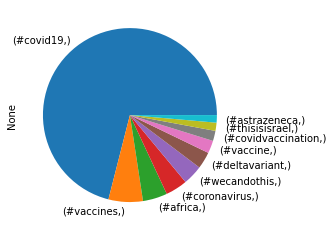

In [25]:
flattened_hashtags_df.value_counts().head(10).plot(kind="pie");

<h2>User mentions<h2>

In [26]:
tweets_df["user_mentions"]

0                  @whoafro @jriggers
1                                 NaN
2          @research2note @nhsrdforum
3                                 NaN
4       @texaschildrens @biological_e
                    ...              
6527                     @givenkazeni
6528                              NaN
6529             @jenfeds73 @dcrinyyc
6530                     @moetitshidi
6531                      @shawajason
Name: user_mentions, Length: 6532, dtype: object

In [27]:
# take the rows from that have values in the user_mentions columns
user_mentions_list_df = tweets_df.loc[tweets_df["user_mentions"].notnull()]
user_mentions_list_df = user_mentions_list_df['user_mentions']
user_mentions_list_df

0                                      @whoafro @jriggers
2                              @research2note @nhsrdforum
4                           @texaschildrens @biological_e
11      @biocubafarma @finlayinstituto @cda_dc @wola_o...
14                                             @yakilopez
                              ...                        
6525                                          @shawajason
6527                                         @givenkazeni
6529                                 @jenfeds73 @dcrinyyc
6530                                         @moetitshidi
6531                                          @shawajason
Name: user_mentions, Length: 2722, dtype: object

In [28]:
#create dataframe where each user_mention gets its own row
flattened_user_mentions = []
for user_mentions_list in user_mentions_list_df:
    user_mentions_list = user_mentions_list.split(" ")
    for user_mentions in user_mentions_list:
        flattened_user_mentions.append(user_mentions)
flattened_user_mentions_df = pd.DataFrame(flattened_user_mentions, columns=['user_mentions'])
flattened_user_mentions_df.head()

,user_mentions
0,@whoafro
1,@jriggers
2,@research2note
3,@nhsrdforum
4,@texaschildrens


In [29]:
flattened_user_mentions_df.value_counts()

user_mentions
@shawajason      715
@moetitshidi     142
@jriggers        123
@whoafro         122
@dailymonitor    115
                ... 
@irfgtkp           1
@irsnews           1
@ishshu            1
@israelinlt        1
@zungulavuyo       1
Length: 1006, dtype: int64

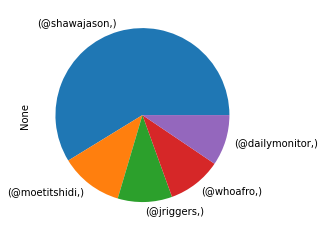

In [30]:
flattened_user_mentions_df.value_counts().head(5).plot(kind="pie");